Пример неустойчивой СЛАУ.

Кстати, определитель матрицы коэффициентов = 1.

In [ ]:
import numpy as np

a=[[5, 7, 6,  5],
[7, 10, 8,  7],
[6, 8,  10, 9],
[5, 7,  9, 10]]

#b = [23, 32, 33, 31]
b = [23.01, 31.99, 32.99, 31.01]
x = np.linalg.solve(a,b)
print(x)



[2.36 0.18 0.65 1.21]


Рассмотрим серию задач решения СЛАУ: aMatrix x = b

aMatrix - матрица коэффициентов - матрица Гильберта соответствующей размерности.

x - решение, единичный вектор.

b - вектор правой части

Параметром в этой серии является nSize - размерность СЛАУ.

При nSize <= 6 встроенный решатель np.linalg.solve из пакета numpy находит решение с приемлемой точностью.

Уже при nSize = 12 относительная погрешность решения, найденного решателем np.linalg.solve, составляет более 50%.

При nSize = 20 решение не имеет ничего общего общего с истинным.

In [ ]:
import numpy as np

nSize = 20

aMatrix = np.zeros((nSize,nSize))
for i in range(nSize):
  for j in range(nSize):
    aMatrix[i][j] = 1 / (1 + i + j)

b = aMatrix.sum(axis=1)

x = np.linalg.solve(aMatrix, b)
print(aMatrix)
print(x)

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625     0.05882353 0.05555556
  0.05263158 0.05      ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625     0.05882353 0.05555556 0.05263158
  0.05       0.04761905]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0625     0.05882353 0.05555556 0.05263158 0.05
  0.04761905 0.04545455]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308 0.07142857 0.06666667
  0.0625     0.05882353 0.05555556 0.05263158 0.05       0.04761905
  0.04545455 0.04347826]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308

Выполним регуляризациию по методу А.Н. Тихонова.

In [ ]:
import numpy as np

nSize = 20
alph = 0.00001

aMatrix = np.zeros((nSize,nSize))
for i in range(nSize):
  for j in range(nSize):
    aMatrix[i][j] = 1 / (1 + i + j)

b = aMatrix.sum(axis=1)

b = np.dot(np.matrix.transpose(aMatrix), b)

aMatrix = np.dot(aMatrix, np.matrix.transpose(aMatrix))
aMatrix += alph * np.identity(nSize)

x = np.linalg.solve(aMatrix, b)
print(x)

[0.99994701 1.0178012  0.97326255 0.97079575 0.98467654 1.00133375
 1.01545577 1.02538132 1.03094963 1.03257068 1.03082829 1.02631484
 1.01956757 1.01104933 1.00114837 0.99018537 0.97842287 0.96607459
 0.9533138  0.9402806 ]


Геометрическая иллюстрация к хорошо обусловленной (устойчивой) СЛАУ.

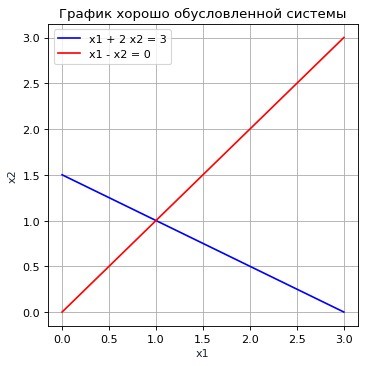

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 3, 2)
y1 = 0.5 * (- x + 3)
y2 = x

plt.figure(figsize=(5, 5), dpi=80)
plt.plot(x, y1, '-b', label='x1 + 2 x2 = 3')
plt.plot(x, y2, '-r', label='x1 - x2 = 0')


plt.title('График хорошо обусловленной системы')
plt.xlabel('x1', color='#1C2833')
plt.ylabel('x2', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Малые возмущения правой части устойчивой СЛАУ приводят к малым изменениям решения.



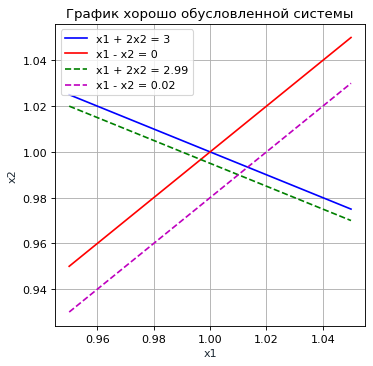

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.95, 1.05, 2)
y1 = 0.5 * (- x + 3)
y2 = x


plt.figure(figsize=(5, 5), dpi=80)
plt.plot(x, y1, '-b', label='x1 + 2x2 = 3')
plt.plot(x, y2, '-r', label='x1 - x2 = 0')

plt.plot(x, 0.5 * (- x + 2.99), '--g', label='x1 + 2x2 = 2.99')
plt.plot(x, x - 0.02, '--m', label='x1 - x2 = 0.02')

plt.title('График хорошо обусловленной системы')
plt.xlabel('x1', color='#1C2833')
plt.ylabel('x2', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Пример неустойчивой СЛАУ 2*2

In [ ]:
import numpy as np

a = [[1,    1],
     [0.99, 1]]
b =  [101,  100] #[100.   1.]
b =  [100,  100]

x = np.linalg.solve(a,b)
print(x)

[  0. 100.]


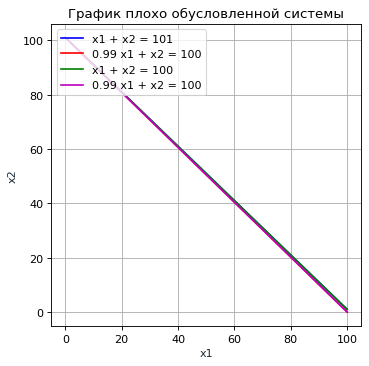

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 100, 2)
y1 =  101 - x
y2 =  (100 -  x)/0.99


plt.figure(figsize=(5, 5), dpi=80)
plt.plot(x, y1, '-b', label='x1 + x2 = 101')
plt.plot(x, y2, '-r', label='0.99 x1 + x2 = 100')

plt.plot(x, y1, '-g', label='x1 + x2 = 100')
plt.plot(x, y2, '-m', label='0.99 x1 + x2 = 100')


plt.title('График плохо обусловленной системы')
plt.xlabel('x1', color='#1C2833')
plt.ylabel('x2', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()



[100.   1.]
[1.   0.01]


Зависимость ошибки численного дифференцирования от величины шага.

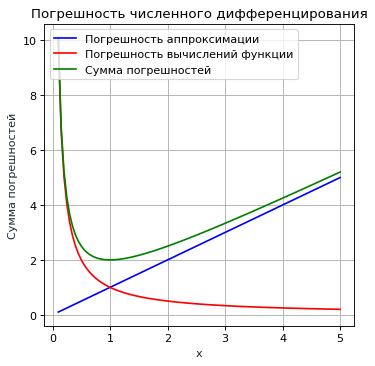

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.1, 5, 100)
y1 = x
y2 = 1/x
y3 = y1 + y2

plt.figure(figsize=(5, 5), dpi=80)
plt.plot(x, y1, '-b', label='Погрешность аппроксимации')
plt.plot(x, y2, '-r', label='Погрешность вычислений функции')
plt.plot(x, y3, '-g', label='Сумма погрешностей')

plt.title('Погрешность численного дифференцирования')
plt.xlabel('x', color='#1C2833')
plt.ylabel('Сумма погрешностей', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()